In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tst
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    confusion_matrix
)

In [98]:
df = pd.read_csv("creditcard.csv")
df

C:\Users\sanga\AppData\Local\Temp\ipykernel_28384\809931545.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65611,51668,-1.522395,0.137421,2.490039,-0.971451,-0.943701,-0.524271,-0.620275,0.779363,-0.120343,...,0.397480,0.671902,-0.181917,0.592475,0.037696,0.978497,-0.151151,-0.076814,33.75,0.0
65612,51668,-5.531358,-0.807012,0.270891,-1.943319,-0.747343,0.789609,2.244849,-1.174104,3.396566,...,-0.849204,0.630370,-0.785251,-0.165327,0.749110,-0.879356,-1.767060,1.180030,278.30,0.0
65613,51669,-1.257514,-5.571721,-1.511417,-0.021249,-2.800362,-0.537595,1.203404,-0.662114,-1.916241,...,0.659585,-0.881950,-1.351283,0.469166,0.133141,-0.216664,-0.259330,0.259628,1457.00,0.0
65614,51670,1.204349,0.311752,0.414037,1.207043,-0.481477,-1.162922,0.203962,-0.228945,0.032635,...,0.048594,0.142558,-0.060408,0.711255,0.624518,-0.347929,0.009372,0.024133,12.98,0.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65616 entries, 0 to 65615
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65616 non-null  int64  
 1   V1      65616 non-null  float64
 2   V2      65616 non-null  float64
 3   V3      65616 non-null  float64
 4   V4      65616 non-null  float64
 5   V5      65616 non-null  float64
 6   V6      65616 non-null  float64
 7   V7      65616 non-null  float64
 8   V8      65616 non-null  float64
 9   V9      65616 non-null  float64
 10  V10     65616 non-null  float64
 11  V11     65616 non-null  float64
 12  V12     65616 non-null  float64
 13  V13     65616 non-null  float64
 14  V14     65616 non-null  float64
 15  V15     65616 non-null  float64
 16  V16     65616 non-null  object 
 17  V17     65615 non-null  float64
 18  V18     65615 non-null  float64
 19  V19     65615 non-null  float64
 20  V20     65615 non-null  float64
 21  V21     65615 non-null  float64
 22

In [100]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,...,65615.000000,65615.000000,65615.000000,65615.000000,65615.000000,65615.000000,65615.000000,65615.000000,65615.000000,65615.000000
mean,33475.060046,-0.240223,-0.013278,0.683963,0.171190,-0.266749,0.103084,-0.113075,0.059448,0.036263,...,-0.028518,-0.106768,-0.039219,0.005792,0.136776,0.019921,0.002185,0.004215,96.265279,0.002576
std,14089.831980,1.856611,1.649275,1.425572,1.378842,1.388387,1.306486,1.254398,1.222357,1.170596,...,0.728918,0.637463,0.602756,0.596639,0.438987,0.497377,0.381378,0.322055,270.053791,0.050686
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27776.250000,-1.000665,-0.585639,0.197777,-0.724346,-0.884650,-0.636586,-0.602712,-0.142552,-0.663092,...,-0.226891,-0.526697,-0.179626,-0.326040,-0.127576,-0.329416,-0.062824,-0.005889,7.680000,0.000000
50%,36973.000000,-0.243106,0.074829,0.773706,0.188286,-0.299086,-0.149340,-0.072966,0.065170,-0.058360,...,-0.061978,-0.081489,-0.051886,0.061383,0.174486,-0.076336,0.009420,0.022742,26.200000,0.000000
75%,43957.250000,1.153948,0.730374,1.407695,1.054359,0.272724,0.495042,0.422165,0.342693,0.694569,...,0.114541,0.308609,0.078940,0.402962,0.423122,0.296720,0.082501,0.076168,88.190000,0.000000
max,51670.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [101]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [102]:
def fill_with_mean(column):
    if column.dtype in [np.float64, np.int64]:
        return column.fillna(column.mean())
    return column

# Apply the function across each column
df = df.apply(fill_with_mean)

In [103]:

df.isnull().sum() #null values removed

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\sanga\AppData\Local\Temp\ipykernel_28384\3831599231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Var_Corr = df.corr()


<AxesSubplot: >

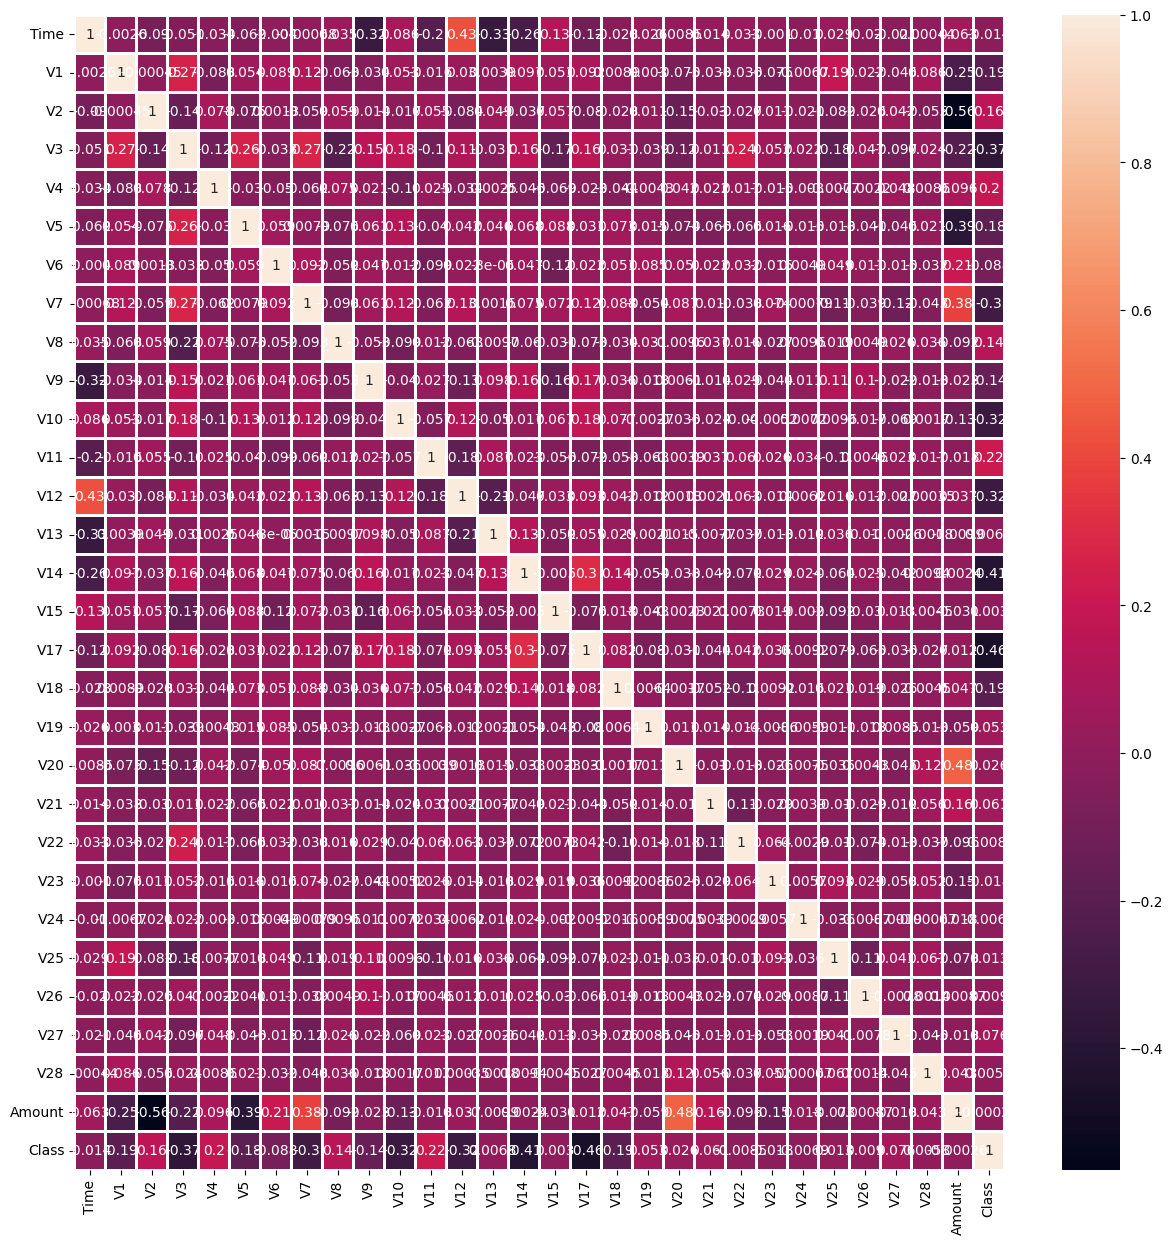

In [104]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, linewidths=1, annot=True, ax=ax)

In [105]:
df.Class.value_counts() #0 means not fraud, 1 means fraud 

0.000000    65446
1.000000      169
0.002576        1
Name: Class, dtype: int64

In [106]:
legit = df[df.Class==0] #discretization
fraud = df[df.Class==1]

In [107]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65610,51668,1.121127,-0.108533,1.396463,1.173700,-1.176442,-0.319901,-0.734677,0.111170,0.765437,...,0.261178,0.750142,-0.083857,0.396580,0.347727,-0.255738,0.070094,0.046544,29.69,0.0
65611,51668,-1.522395,0.137421,2.490039,-0.971451,-0.943701,-0.524271,-0.620275,0.779363,-0.120343,...,0.397480,0.671902,-0.181917,0.592475,0.037696,0.978497,-0.151151,-0.076814,33.75,0.0
65612,51668,-5.531358,-0.807012,0.270891,-1.943319,-0.747343,0.789609,2.244849,-1.174104,3.396566,...,-0.849204,0.630370,-0.785251,-0.165327,0.749110,-0.879356,-1.767060,1.180030,278.30,0.0
65613,51669,-1.257514,-5.571721,-1.511417,-0.021249,-2.800362,-0.537595,1.203404,-0.662114,-1.916241,...,0.659585,-0.881950,-1.351283,0.469166,0.133141,-0.216664,-0.259330,0.259628,1457.00,0.0


In [108]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63421,50706,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1.0
63634,50808,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,-2.412987,...,0.926157,-0.817706,-0.150434,-0.039383,0.485640,-0.264325,1.159690,0.232758,99.99,1.0
64329,51112,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,...,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,99.99,1.0
64411,51135,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,-2.362097,...,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,99.99,1.0


In [109]:
print(legit.shape)
print(fraud.shape)

(65446, 31)
(169, 31)


In [110]:
legit =legit.sample(n=492) #Sampling

In [111]:
df_new = pd.concat([legit,fraud])
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20933,31360,0.097380,0.368399,1.397277,0.718448,-0.922548,0.089988,-0.431618,-0.026278,-0.962055,...,-0.134649,0.145544,0.229615,-0.167809,-1.538772,-0.412102,0.113039,0.261633,15.92,0.0
8217,11053,1.305931,0.031697,0.538230,0.123286,-0.361801,-0.344294,-0.404186,-0.191586,1.683818,...,-0.113180,-0.025037,-0.128034,-0.418664,0.343277,1.080865,-0.085722,-0.001139,15.95,0.0
47022,43042,-0.834348,0.951079,1.032081,1.134275,1.835395,1.405060,0.874547,0.521580,-1.856989,...,0.307353,0.839443,-0.022183,-1.014678,-0.353910,-0.046447,0.135229,0.121501,22.06,0.0
20970,31388,-3.577333,-0.280799,-1.322641,-1.439070,-6.982956,2.768801,4.605171,0.132811,0.439305,...,-0.100779,0.895987,-1.047785,0.564647,0.237859,-0.724914,0.408511,-0.897914,1208.00,0.0
54107,46288,-2.646796,2.031232,0.877297,0.679499,-1.035748,-0.581932,0.053651,0.682440,0.375200,...,0.013225,0.502305,-0.369955,0.401410,0.770922,-0.096544,0.447147,0.190107,46.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63421,50706,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1.0
63634,50808,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,-2.412987,...,0.926157,-0.817706,-0.150434,-0.039383,0.485640,-0.264325,1.159690,0.232758,99.99,1.0
64329,51112,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,...,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,99.99,1.0
64411,51135,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,-2.362097,...,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,99.99,1.0


In [112]:
df_new = df_new.drop(columns=["V16"])

In [113]:
X= df_new.drop(columns='Class')
Y = df_new["Class"]

In [114]:
print(X.shape) 
print(Y.shape) 

(661, 29)
(661,)


In [115]:
X_train, X_Test, Y_Train, Y_Test = tst(X,Y,test_size=0.3)  #train test split in 70/30

In [116]:
print(X_train.shape, Y_Train.shape)  
print(X_Test.shape, Y_Test.shape)

(462, 29) (462,)
(199, 29) (199,)


Logistic Regression

In [117]:
log = LogisticRegression(max_iter=1000).fit(X_train,Y_Train)

In [118]:
Y_pred =log.predict(X_Test)

In [119]:
Y_pred.shape

(199,)

In [120]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.969849
1  Precision  0.929825
2     Recall  0.963636
3   F1 Score  0.946429
4   F2 Score  0.956679
5  AUC Score  0.967929


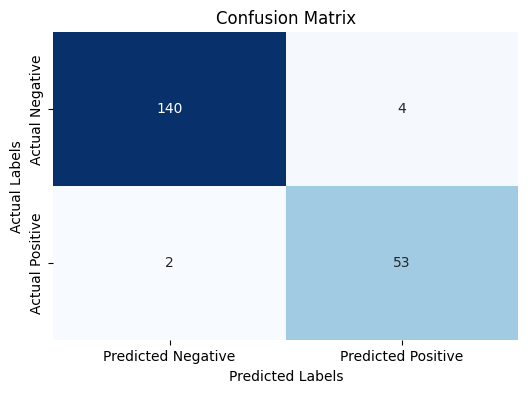

In [121]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

Decesion Tree

In [122]:
decision = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0).fit(X_train,Y_Train) #used gini index

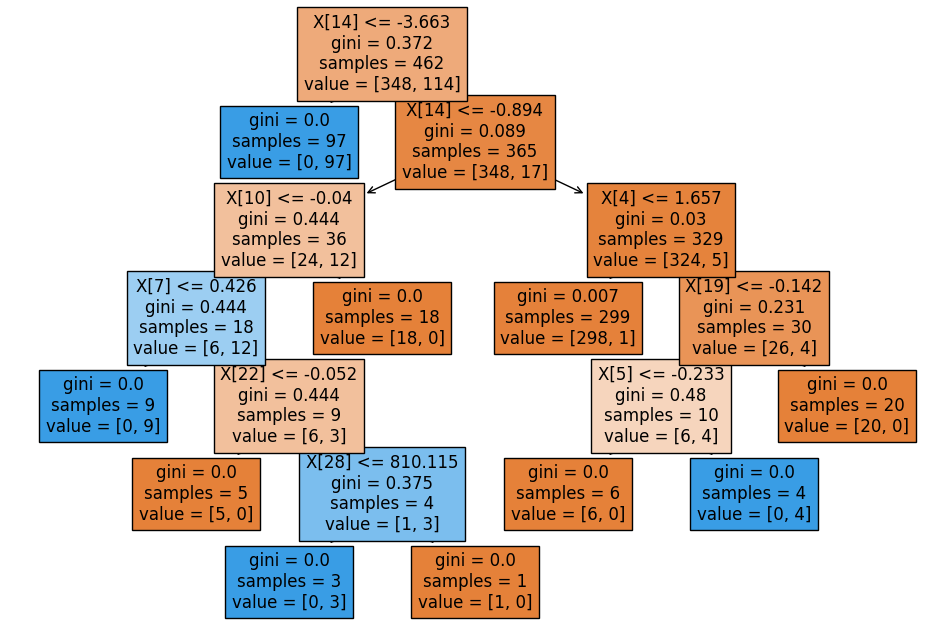

In [123]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Set the figure size (optional)
plot_tree(decision, filled=True)
plt.show()

In [124]:
Y_pred = decision.predict(X_Test)

In [125]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.944724
1  Precision  0.866667
2     Recall  0.945455
3   F1 Score  0.904348
4   F2 Score  0.928571
5  AUC Score  0.944949


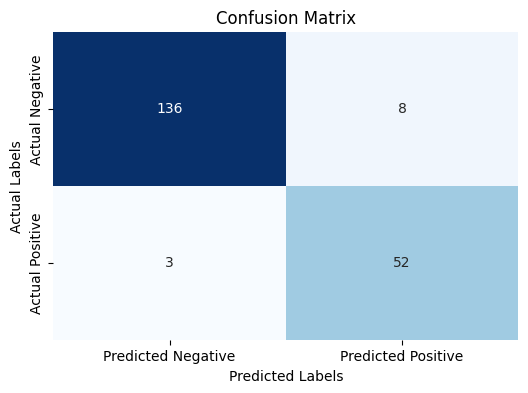

In [126]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

Random Forest

In [127]:
clf = RandomForestClassifier().fit(X_train,Y_Train)

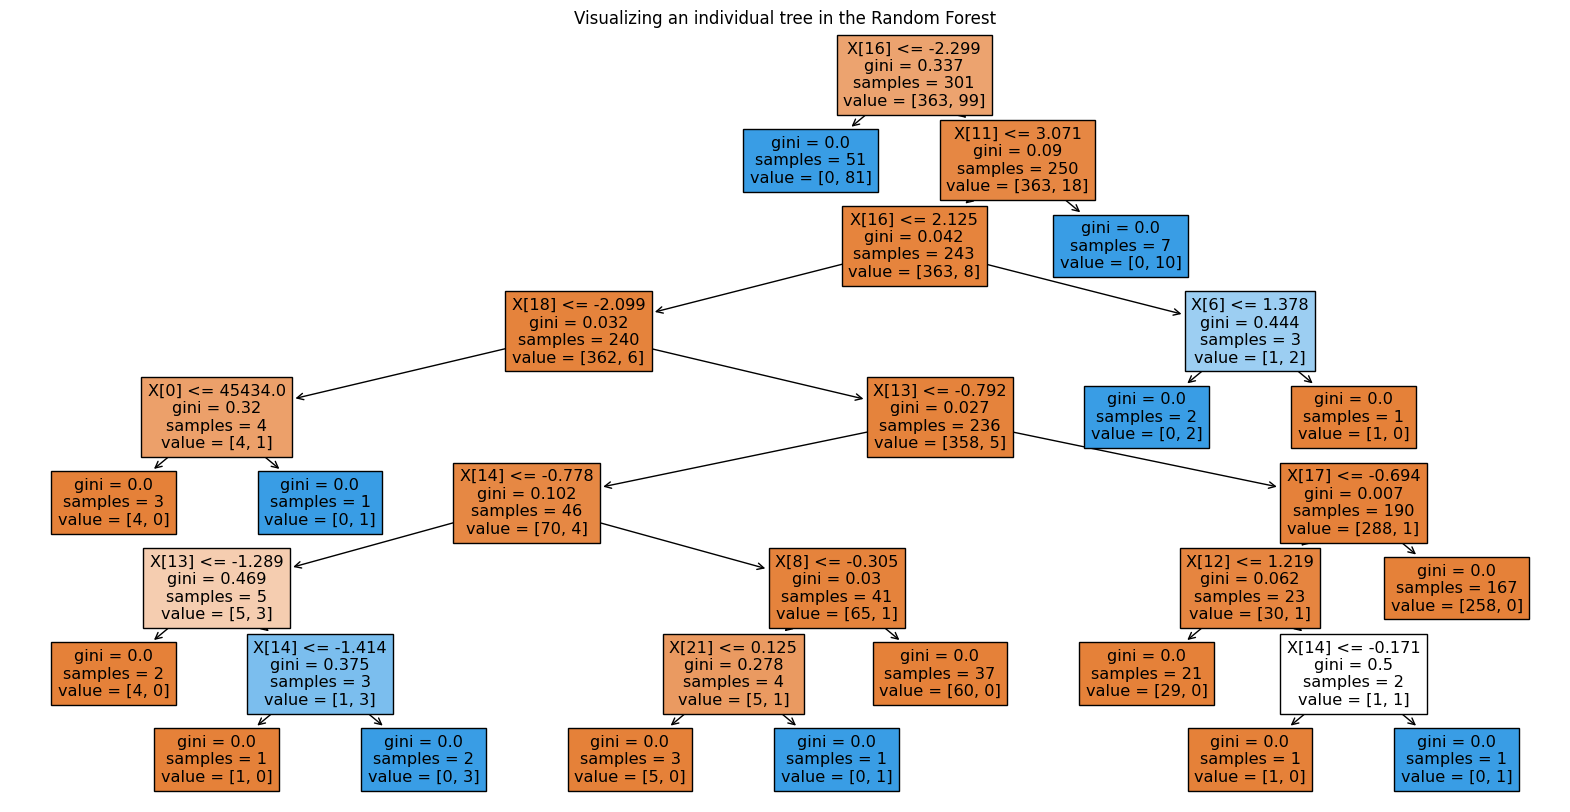

In [128]:
tree = clf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True)
plt.title("Visualizing an individual tree in the Random Forest")
plt.show()

In [129]:
Y_pred = clf.predict(X_Test)

In [130]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.979899
1  Precision  0.981132
2     Recall  0.945455
3   F1 Score  0.962963
4   F2 Score  0.952381
5  AUC Score  0.969255


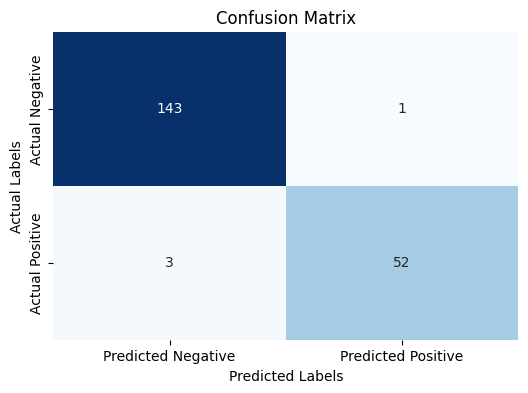

In [131]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

Support Vector Classifier(SVC)

In [132]:
svc1 = SVC(kernel='linear').fit(X_train,Y_Train)

In [133]:
Y_pred = svc1.predict(X_Test)

In [134]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.974874
1  Precision  0.980769
2     Recall  0.927273
3   F1 Score  0.953271
4   F2 Score  0.937500
5  AUC Score  0.960164


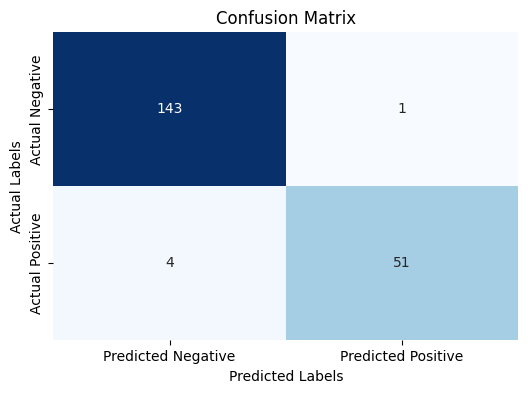

In [135]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


K-Nearest Neighbours

In [136]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)

In [137]:
knn.fit(X_train,Y_Train)

KNeighborsClassifier(n_neighbors=10)

In [138]:
Y_pred = knn.predict(X_Test)

In [139]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.783920
1  Precision  0.772727
2     Recall  0.309091
3   F1 Score  0.441558
4   F2 Score  0.351240
5  AUC Score  0.637184


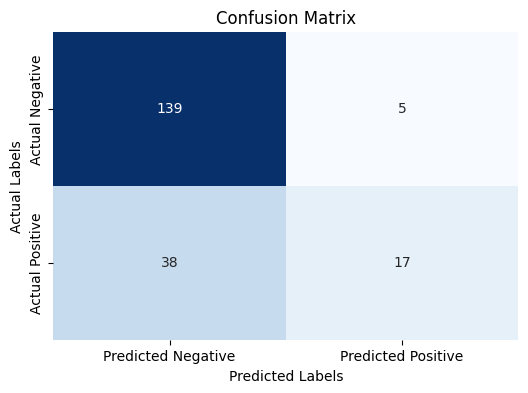

In [140]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

XGBoost

In [141]:
model = XGBClassifier().fit(X_train,Y_Train)

In [142]:
Y_pred = model.predict(X_Test)

In [143]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.969849
1  Precision  0.929825
2     Recall  0.963636
3   F1 Score  0.946429
4   F2 Score  0.956679
5  AUC Score  0.967929


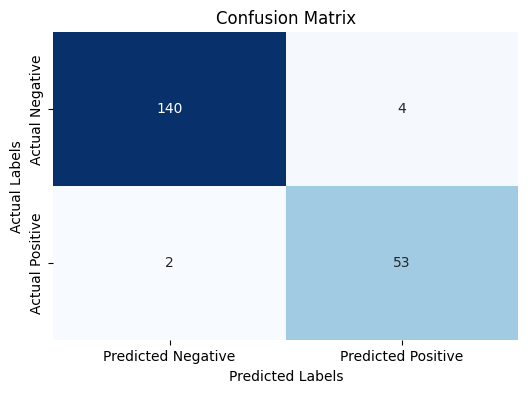

In [144]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

Gradient Boosting

In [145]:
grad = GradientBoostingClassifier().fit(X_train,Y_Train)

In [146]:
Y_pred = grad.predict(X_Test)

In [147]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.969849
1  Precision  0.929825
2     Recall  0.963636
3   F1 Score  0.946429
4   F2 Score  0.956679
5  AUC Score  0.967929


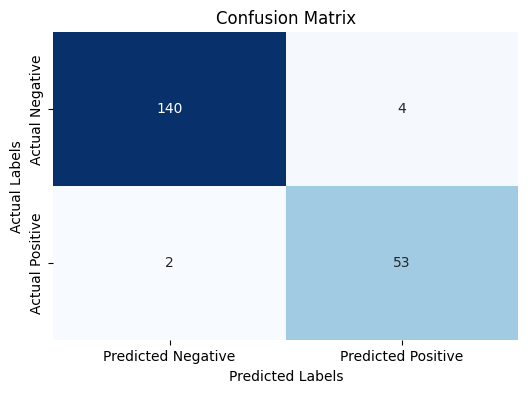

In [148]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

Artificial Neural Network(ANN)

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_Test)

In [150]:
import tensorflow as tf

In [151]:
ann = tf.keras.models.Sequential()

In [152]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu")) #Hidden Layer 1

In [153]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu")) #Hidden Layer 2

In [154]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid")) #Output Layer

In [155]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [156]:
ann.fit(X_train,Y_Train,batch_size=32,epochs = 100)

Epoch 1/100


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4497 - loss: 0.7328
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5766 - loss: 0.6844 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.6816 - loss: 0.6448
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7512 - loss: 0.6134 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.5661 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8824 - loss: 0.5297 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9127 - loss: 0.4846 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9366 - loss: 0.4172 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9260 - loss: 0.3913 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.3372 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9063 - loss: 0.3392 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

In [157]:
test_loss, test_acc = ann.evaluate(X_test, Y_Test)

print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9807 - loss: 0.0717  
Test Accuracy: 0.9698492288589478, Test Loss: 0.11105630546808243


In [158]:
predictions = ann.predict(X_test)
Y_pred = (predictions > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [159]:
metrics = {
    "Accuracy": accuracy_score(Y_Test, Y_pred),
    "Precision": precision_score(Y_Test, Y_pred),
    "Recall": recall_score(Y_Test, Y_pred),
    "F1 Score": f1_score(Y_Test, Y_pred),
    "F2 Score": fbeta_score(Y_Test, Y_pred, beta=2),
    "AUC Score": roc_auc_score(Y_Test,Y_pred)
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.969849
1  Precision  0.929825
2     Recall  0.963636
3   F1 Score  0.946429
4   F2 Score  0.956679
5  AUC Score  0.967929


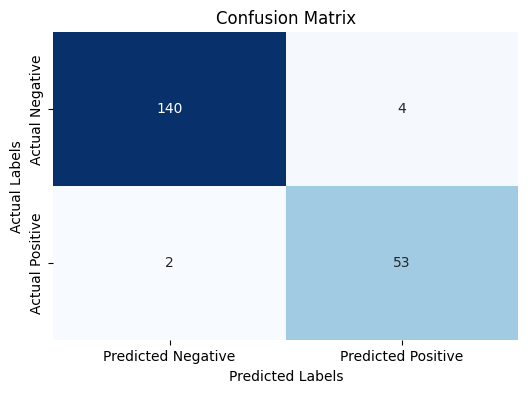

In [160]:
cm = confusion_matrix(Y_Test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [161]:
ann.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 6)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689 (2.70 KB)

 Trainable params: 229 (916.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 460 (1.80 KB)